## Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data-input file

In [3]:
df = pd.read_csv('data-input.csv')
df

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


## Setting up the data

In [4]:
# We are going to filter out the columns we won't be using
df.iloc[:,1:]
df2 = df
df2 = df2.drop(columns=['Unnamed: 0', 'key', 'liveness', 'mode', 'speechiness', 'time_signature', 'target'])
df2

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,tempo,valence,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,-8.795,150.062,0.286,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,-10.401,160.083,0.588,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,-7.148,75.044,0.173,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,-15.236,86.468,0.230,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,-11.648,174.004,0.904,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,-3.501,74.976,0.211,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,-2.663,110.041,0.867,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,-2.467,150.082,0.470,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,-2.735,150.011,0.623,First Contact,Twin Moons


In [5]:
# Reordering the columns
df2 = df2.reindex(columns=['song_title', 'artist', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'loudness', 'tempo', 'valence'])
df2

,song_title,artist,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,tempo,valence
0,Mask Off,Future,0.01020,0.833,204600,0.434,0.021900,-8.795,150.062,0.286
1,Redbone,Childish Gambino,0.19900,0.743,326933,0.359,0.006110,-10.401,160.083,0.588
2,Xanny Family,Future,0.03440,0.838,185707,0.412,0.000234,-7.148,75.044,0.173
3,Master Of None,Beach House,0.60400,0.494,199413,0.338,0.510000,-15.236,86.468,0.230
4,Parallel Lines,Junior Boys,0.18000,0.678,392893,0.561,0.512000,-11.648,174.004,0.904
...,...,...,...,...,...,...,...,...,...,...
2012,Like A Bitch - Kill The Noise Remix,Kill The Noise,0.00106,0.584,274404,0.932,0.002690,-3.501,74.976,0.211
2013,Candy,Dillon Francis,0.08770,0.894,182182,0.892,0.001670,-2.663,110.041,0.867
2014,Habit - Dack Janiels & Wenzday Remix,Rain Man,0.00857,0.637,207200,0.935,0.003990,-2.467,150.082,0.470
2015,First Contact,Twin Moons,0.00164,0.557,185600,0.992,0.677000,-2.735,150.011,0.623


In [6]:
# Save this new dataframe to a file
df2.to_csv('data.csv')

## Cleaning the data

In [12]:
# data.csv already contains only the columns of interest.
# Since the dataset doesn't contain any null/empty entries, no further cleaning is required.
# Hence, data-cleaned.csv is the same as data.csv
df2 = pd.read_csv('data.csv', index_col=0)
df2.to_csv('data-cleaned.csv')

#  Visualizations

In [13]:
# Read the data
spotify = pd.read_csv('data-cleaned.csv', index_col=0)

# View the sorted by the valence in ascending order
# Note: this doesn't actually modify the dataframe
spotify.sort_values('valence', ascending=True)

,song_title,artist,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,tempo,valence
1439,Polaris,deadmau5,0.0362,0.670,585000,0.7920,0.88100,-8.211,128.018,0.0348
57,L$D,A$AP Rocky,0.1930,0.598,238307,0.2520,0.13800,-15.086,120.060,0.0359
813,Damn Son Where'd You Find This? (feat. Kelly H...,Markus Maximus,0.1140,0.665,216728,0.5130,0.30300,-7.314,100.344,0.0373
811,"Damn Son, Where'd You Find This? - Future of T...",Trendsetter,0.1140,0.665,216728,0.5130,0.30300,-7.314,100.344,0.0373
1876,"Nocturne No.1 In B Flat Minor, Op.9 No.1",Frédéric Chopin,0.9940,0.206,336000,0.0347,0.82800,-25.351,67.584,0.0378
...,...,...,...,...,...,...,...,...,...,...
48,Azon de ma gnin kpevi,T. P. Orchestre Poly-Rythmo,0.3750,0.796,252547,0.8600,0.00457,-6.202,129.008,0.9730
207,Look at You,George McCrae,0.8270,0.712,279800,0.7700,0.54800,-13.187,106.963,0.9730
1966,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)",Polina,0.4830,0.687,152400,0.7240,0.00000,-4.206,139.705,0.9740
912,I'm Walkin' - 2002 Digital Remaster,Fats Domino,0.8470,0.661,128053,0.7600,0.33400,-9.509,111.165,0.9750


In [14]:
# Dataframe for convenience
spotify

,song_title,artist,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,tempo,valence
0,Mask Off,Future,0.01020,0.833,204600,0.434,0.021900,-8.795,150.062,0.286
1,Redbone,Childish Gambino,0.19900,0.743,326933,0.359,0.006110,-10.401,160.083,0.588
2,Xanny Family,Future,0.03440,0.838,185707,0.412,0.000234,-7.148,75.044,0.173
3,Master Of None,Beach House,0.60400,0.494,199413,0.338,0.510000,-15.236,86.468,0.230
4,Parallel Lines,Junior Boys,0.18000,0.678,392893,0.561,0.512000,-11.648,174.004,0.904
...,...,...,...,...,...,...,...,...,...,...
2012,Like A Bitch - Kill The Noise Remix,Kill The Noise,0.00106,0.584,274404,0.932,0.002690,-3.501,74.976,0.211
2013,Candy,Dillon Francis,0.08770,0.894,182182,0.892,0.001670,-2.663,110.041,0.867
2014,Habit - Dack Janiels & Wenzday Remix,Rain Man,0.00857,0.637,207200,0.935,0.003990,-2.467,150.082,0.470
2015,First Contact,Twin Moons,0.00164,0.557,185600,0.992,0.677000,-2.735,150.011,0.623


In [15]:
# Describe the dataset
spotify.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,tempo,valence
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,-7.085624,121.603272,0.496815
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.761684,26.685604,0.247195
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,-33.097000,47.859000,0.034800
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,-8.394000,100.189000,0.295000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,-6.248000,121.427000,0.492000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,-4.746000,137.849000,0.691000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,-0.307000,219.331000,0.992000


### Scatter Plot

Valence vs. Energy


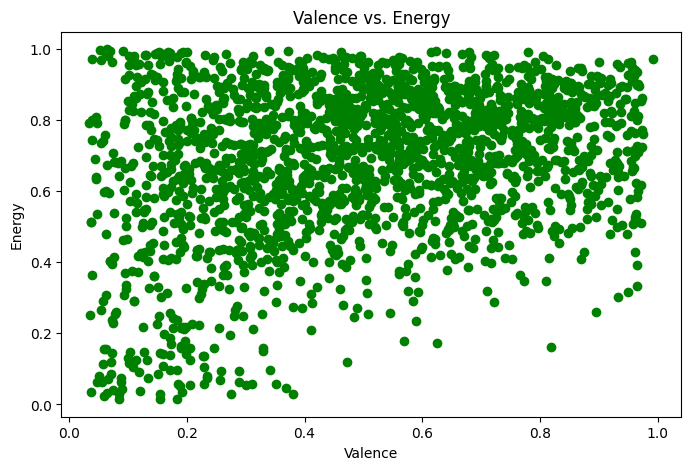

In [16]:
# A scatter plot showing the relationship between a song's tempo and it's valence
plt.figure(figsize=(8,5))

# You can change the x and y here
x = 'Valence'
y = 'Energy'
title = x + ' vs. ' + y
print(title)
plt.title(title)

plt.xlabel(x)
plt.ylabel(y)


# xticks = np.array([0, 50, 100, 150, 200, 250])
# plt.xticks(xticks)

# Actual columns names from the dataset are all lowercase
plt.scatter(spotify[x.lower()], spotify[y.lower()], color='green')

plt.savefig('plot1.jpg', dpi=300)

plt.show()

### Histogram

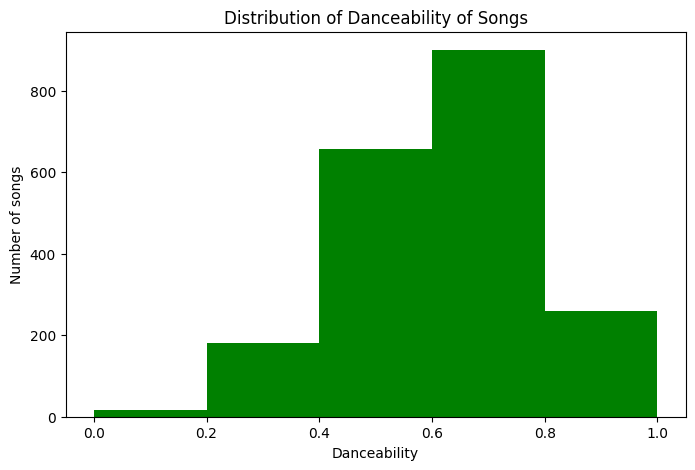

In [17]:
# Create a distribution of the danceability of each song in our data frame
# Danceability is a value between 0 and 1
# A value closer to 1 indicates the song is more danceable
plt.figure(figsize=(8,5))

title = 'Distribution of Danceability of Songs'
plt.title(title)

bins = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.hist(spotify['danceability'], bins=bins, color='green')
plt.xticks(bins)

plt.xlabel('Danceability')
plt.ylabel('Number of songs')

plt.savefig('plot2.jpg', dpi=300)

plt.show()

### Line Chart

In [18]:
x = 'energy'
y = 'loudness'
df_new = spotify[[x, y]].copy()
df_new = df_new.sort_values([x], ascending=True)
df_new

,energy,loudness
1594,0.0148,-33.097
1595,0.0156,-24.801
1537,0.0161,-25.358
1598,0.0230,-31.082
1596,0.0288,-31.367
...,...,...
2015,0.9920,-2.735
1347,0.9930,-3.416
1297,0.9940,-4.584
1322,0.9970,-3.587


energy
loudness


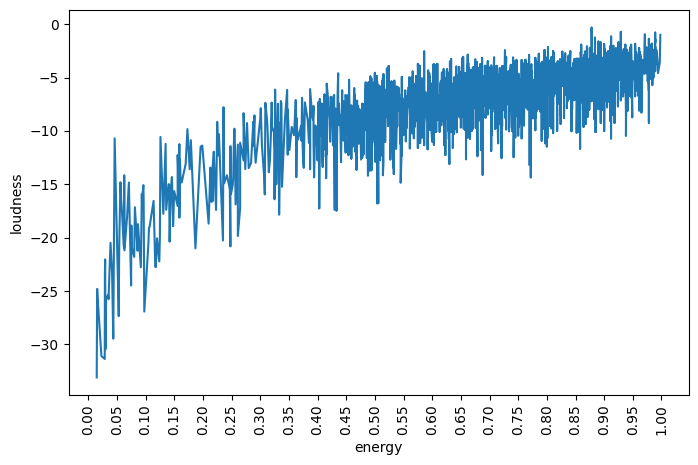

In [19]:
plt.figure(figsize=(8,5))

x_axis = df_new[x]
y_axis = df_new[y]

plt.xlabel(x)
plt.ylabel(y)

plt.xticks(np.arange(0, max(x_axis)+1, 0.05), rotation=90)

print(x)
print(y)

plt.plot(x_axis, y_axis)

plt.savefig('plot3.jpg', dpi=300)

plt.show()

### Bar Graph (just for fun, ignore this :D)

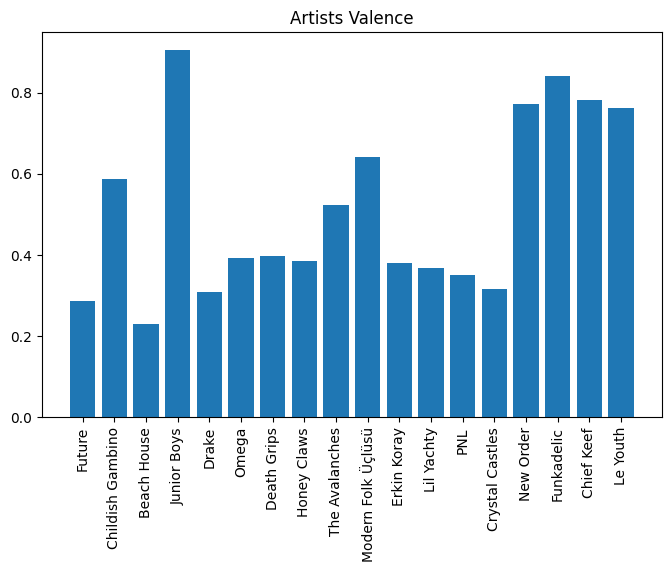

In [20]:
plt.figure(figsize=(8,5))

title = 'Artists Valence'
plt.title(title)

plt.xticks(rotation=90)

x = spotify['artist'].head(20)
y = spotify['valence'].head(20)
plt.bar(x, y)

plt.show()

In [21]:
future = spotify.loc[spotify['artist'] == 'Future'] # All Future songs
drake = spotify.loc[spotify['artist'] == 'Drake'] # All Drake songs
gambino = spotify.loc[spotify['artist'] == 'Childish Gambino']
weeknd = spotify.loc[spotify['artist'] == 'The Weeknd']
keef = spotify.loc[spotify['artist'] == 'Chief Keef']
uzi = spotify.loc[spotify['artist'] == 'Lil Uzi Vert']
migos = spotify.loc[spotify['artist'] == 'Migos']
meek = spotify.loc[spotify['artist'] == 'Meek Mill']
drake

,song_title,artist,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,tempo,valence
5,Sneakin’,Drake,0.00479,0.804,251333,0.560,0.000000,-6.682,85.023,0.264
6,Childs Play,Drake,0.01450,0.739,241400,0.472,0.000007,-11.204,80.030,0.308
37,Jumpman,Drake,0.05650,0.853,205879,0.547,0.000000,-7.535,142.065,0.677
117,Hotline Bling,Drake,0.00257,0.896,267024,0.623,0.000258,-8.008,134.962,0.564
154,Big Rings,Drake,0.00157,0.790,217707,0.676,0.000000,-6.432,132.002,0.314
158,Know Yourself,Drake,0.19000,0.735,275840,0.410,0.000000,-8.735,114.812,0.160
168,Wu-Tang Forever,Drake,0.04720,0.849,217693,0.408,0.000000,-8.670,99.876,0.337
440,Headlines,Drake,0.36900,0.662,236733,0.571,0.000197,-7.382,152.009,0.442
589,Started From the Bottom,Drake,0.04250,0.790,173160,0.531,0.000000,-6.968,86.306,0.498
676,"Hold On, We're Going Home",Drake,0.00300,0.766,227027,0.453,0.000035,-6.651,100.002,0.346
